# Introduction to the xgbsurv package - EH

This notebook introduces `xgbsurv` using a specific dataset. It structured by the following steps:

- Load data
- Load model
- Fit model
- Predict and evaluate model

The syntax conveniently follows that of sklearn.

In [1]:
from xgbsurv.datasets import load_metabric
from xgbsurv import XGBSurv
from xgbsurv.models.utils import sort_X_y, transform_back, sort_X_y_pandas
from pycox.evaluation import EvalSurv
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
current_path = os.getcwd() 
one_level_up = os.path.abspath(os.path.join(current_path,  ".."))

## Load Data

In [2]:
data = load_metabric(path=one_level_up+"/xgbsurv/datasets/data/", as_frame=True)
# stratify by event indicated by sign
target_sign = np.sign(data.target)
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, stratify=target_sign)
# sort data
X_train, y_train = sort_X_y_pandas(X_train, y_train)
y_train = pd.concat([y_train,y_train], axis=1)
y_train.columns = ['target1', 'target2']
X_test, y_test = sort_X_y_pandas(X_test, y_test)

## Load Model

In [3]:
model = XGBSurv(n_estimators=100, objective="eh_objective",
                                             eval_metric="eh_loss",
                                             learning_rate=0.3,
                                             random_state=42, 
                                             disable_default_eval_metric=1,
                                             )
model

XGBSurv(base_score=None, booster=None, callbacks=None, colsample_bylevel=None,
        colsample_bynode=None, colsample_bytree=None,
        disable_default_eval_metric=1, early_stopping_rounds=None,
        enable_categorical=False,
        eval_metric=CPUDispatcher(<function eh_likelihood at 0x29f2eaa20>),
        feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
        importance_type=None, interaction_constraints=None, learning_rate=0.3,
        max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
        max_delta_step=None, max_depth=None, max_leaves=None,
        min_child_weight=None, missing=nan, monotone_constraints=None,
        n_estimators=100, n_jobs=None, num_parallel_tree=None,
        objective=CPUDispatcher(<function eh_objective at 0x29f2eb1a0>), ...)

The options of loss and objective functions can be obtained like below:

In [4]:
print(model.get_loss_functions().keys())
print(model.get_objective_functions().keys())

dict_keys(['breslow_loss', 'efron_loss', 'cind_loss', 'deephit_loss', 'aft_loss', 'ah_loss', 'eh_loss'])
dict_keys(['breslow_objective', 'efron_objective', 'cind_objective', 'deephit_objective', 'aft_objective', 'ah_objective', 'eh_objective'])


## Fit Model

In [5]:
eval_set = [(X_train, y_train)]

In [6]:
model.fit(X_train, y_train, eval_set=eval_set)

Data type is not correct - use either pandas DataFrame/Series or numpy ndarray. 
[0]	validation_0-eh_likelihood:2553.77091
[1]	validation_0-eh_likelihood:2532.42634
[2]	validation_0-eh_likelihood:2512.41480
[3]	validation_0-eh_likelihood:2494.22310
[4]	validation_0-eh_likelihood:2478.02868
[5]	validation_0-eh_likelihood:2462.96059
[6]	validation_0-eh_likelihood:2446.73866
[7]	validation_0-eh_likelihood:2431.53712
[8]	validation_0-eh_likelihood:2411.84648
[9]	validation_0-eh_likelihood:2393.25036
[10]	validation_0-eh_likelihood:2374.98230
[11]	validation_0-eh_likelihood:2363.36467
[12]	validation_0-eh_likelihood:2344.40236
[13]	validation_0-eh_likelihood:2324.87357
[14]	validation_0-eh_likelihood:2310.77148
[15]	validation_0-eh_likelihood:2298.65693
[16]	validation_0-eh_likelihood:2281.13993
[17]	validation_0-eh_likelihood:2270.45760
[18]	validation_0-eh_likelihood:2255.04798
[19]	validation_0-eh_likelihood:2241.23318
[20]	validation_0-eh_likelihood:2230.54081
[21]	validation_0-eh_likel

XGBSurv(base_score=None, booster=None, callbacks=None, colsample_bylevel=None,
        colsample_bynode=None, colsample_bytree=None,
        disable_default_eval_metric=1, early_stopping_rounds=None,
        enable_categorical=False,
        eval_metric=CPUDispatcher(<function eh_likelihood at 0x29f2eaa20>),
        feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
        importance_type=None, interaction_constraints=None, learning_rate=0.3,
        max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
        max_delta_step=None, max_depth=None, max_leaves=None,
        min_child_weight=None, missing=nan, monotone_constraints=None,
        n_estimators=100, n_jobs=None, num_parallel_tree=None,
        objective=CPUDispatcher(<function eh_objective at 0x29f2eb1a0>), ...)

The model can be saved like below. Note that objective and eval_metric are not saved.

In [7]:
#model.save_model("introduction_model_breslow.json")

## Predict

In [8]:
preds_train = model.predict(X_train, output_margin=True)
preds_test = model.predict(X_test, output_margin=True)

### Predict Cumulative Hazard

In [9]:
df_cum_hazards = model.predict_cumulative_hazard_function(X_train.to_numpy(), X_test.to_numpy(), y_train.to_numpy(), y_test.to_numpy())
df_cum_hazards.tail(3)

integration_values.shape[0] 86901


,0,1,2,3,4,5,6,7,8,9,...,466,467,468,469,470,471,472,473,474,475
330.366669,3.888181,3.823744,4.857979,1.779695,3.939373,1.652309,0.803642,1.277773,1.338319,2.815945,...,1.642548,0.830301,1.651918,1.521499,1.856451,0.500144,0.842642,0.921914,2.700545,1.216579
337.033325,4.025812,3.940147,4.952122,1.808092,3.940907,1.662403,0.813504,1.278195,1.351280,2.817008,...,1.646744,0.839756,1.657544,1.527373,1.864166,0.504906,0.842929,0.936317,2.702076,1.245597
355.200012,4.384312,4.239062,5.178520,1.874847,3.943890,1.684638,0.836283,1.279016,1.380465,2.819099,...,1.655520,0.861281,1.669244,1.539838,1.880532,0.515611,0.843486,0.970072,2.705102,1.316503


## Predict Survival Function

In [10]:
df_survival_function = model.predict_survival_function(X_train.to_numpy(), X_test.to_numpy(), y_train.to_numpy(), y_test.to_numpy())
df_survival_function.tail(3)

integration_values.shape[0] 86901


,0,1,2,3,4,5,6,7,8,9,...,466,467,468,469,470,471,472,473,474,475
330.366669,0.020483,0.021846,0.007766,0.168690,0.019460,0.191607,0.447696,0.278657,0.262286,0.059848,...,0.193486,0.435918,0.191682,0.218384,0.156226,0.606443,0.430572,0.397757,0.067169,0.296242
337.033325,0.017849,0.019445,0.007068,0.163967,0.019431,0.189683,0.443302,0.278540,0.258909,0.059785,...,0.192676,0.431816,0.190606,0.217105,0.155026,0.603562,0.430448,0.392069,0.067066,0.287769
355.200012,0.012471,0.014421,0.005636,0.153378,0.019373,0.185512,0.433318,0.278311,0.251462,0.059660,...,0.190993,0.422620,0.188389,0.214416,0.152509,0.597136,0.430208,0.379056,0.066864,0.268071


### Visualize Predictions

Text(0.5, 1.0, 'Cumulative Hazard EH')

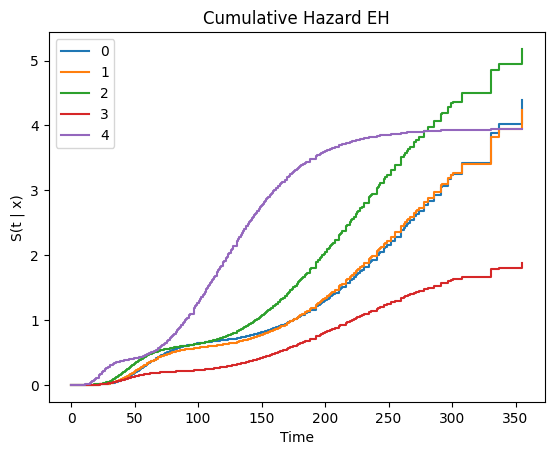

In [11]:
df_cum_hazards.iloc[:, :5].plot(drawstyle='steps-post')
plt.ylabel('S(t | x)')
_ = plt.xlabel('Time')
plt.title("Cumulative Hazard EH")

Text(0.5, 1.0, 'Survival Curve EH')

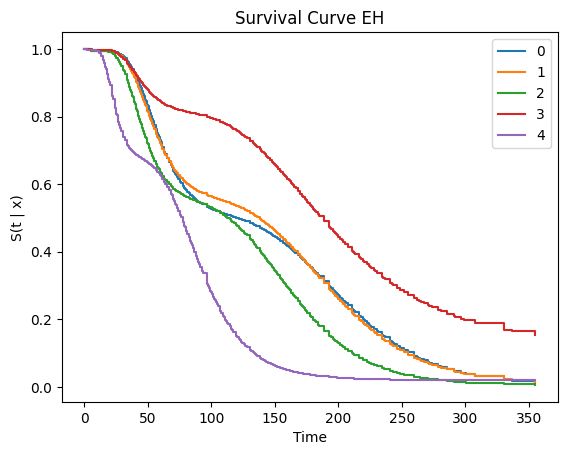

In [12]:
df_survival_function.iloc[:, :5].plot(drawstyle='steps-post')
plt.ylabel('S(t | x)')
_ = plt.xlabel('Time')
plt.title("Survival Curve EH")

## Evaluate

### Test

In [13]:
durations_test, events_test = transform_back(y_test.values)
time_grid = np.linspace(durations_test.min(), durations_test.max(), 100)
ev = EvalSurv(df_survival_function, durations_test, events_test, censor_surv='km')
print('Concordance Index',ev.concordance_td('antolini'))

Concordance Index 0.602072461421579


In [14]:
print('Integrated Brier Score:',ev.integrated_brier_score(time_grid))

Integrated Brier Score: 0.1829188598307272
